Now that I have the 4-vectors working, that last one got messy so this will just be to plot the distance between protons and pi0s :) ie deltaR!

In [1]:
#imports
import uproot as ur
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
import vector as v

data_path = '/fast_scratch/atlas_images/v01-45/'

In [75]:
import atlas_mpl_style as ampl #makes matplotlib follow atlas formal style
ampl.use_atlas_style()

In [2]:
v.register_awkward()

In [47]:
branches = ['cluster_hitsTruthIndex', 'cluster_hitsTruthE', 'truthPartPdgId', 'truthPartPt','truthPartEta', 
            'truthPartPhi', 'truthPartPt', 'truthPartMass']

events = ur.open(data_path+'delta_medium.root')

tree = events['EventTree']

In [48]:
the_branches = tree.arrays(expressions=branches)

In [94]:
truthE = the_branches.cluster_hitsTruthE
truthEIndex = the_branches.cluster_hitsTruthIndex
truthID = the_branches.truthPartPdgId
trutheta = the_branches.truthPartEta
truthphi = the_branches.truthPartPhi
truthpt = the_branches.truthPartPt
truthmass = the_branches.truthPartMass

In [95]:
print(truthmass)

[[0, 0.94, 0.135, -1.08e-08, 3.05e-08], [0, ... 0, 4.67e-09], [0, 0.938, 0.14]]


In [50]:
print(truthpt)

[[7.43, 4.49, 2.98, 0.861, 2.12], [42.7, ... 1.9, 1.79, 0.11], [2.57, 1.88, 0.694]]


In [86]:
print(len(ak.flatten(ak.flatten(truthE)))), len(IDflat)

1388226


(None, 751874)

In [89]:
print(ak.flatten(truthE))

[[1.8, 0.000907], [0.795], [0.57, 0.000973, ... [0.0521], [0.431], [0.905]]


In [96]:
IDflat = np.array(ak.flatten(truthID)) #this is the flat IDs
etaflat = np.array(ak.flatten(trutheta))
phiflat = np.array(ak.flatten(truthphi))
#I think this is all I need actually?
ptflat = np.array(ak.flatten(truthpt))
Eflat = np.array(ak.flatten(ak.flatten(truthE))) #there are more energy values??
massflat = np.array(ak.flatten(truthmass))

In [8]:
pi0_cut = IDflat == 111
prot_cut = IDflat == 2212

In [97]:
eta_pi0_slice = etaflat[pi0_cut]
eta_prot_slice = etaflat[prot_cut]

phi_pi0_slice = phiflat[pi0_cut]
phi_prot_slice = phiflat[prot_cut]

pt_pi0_slice = ptflat[pi0_cut]
pt_prot_slice = ptflat[prot_cut]

m_pi0_slice = massflat[pi0_cut]
m_prot_slice = massflat[prot_cut]

In [10]:
len(eta_pi0_slice), len(eta_prot_slice), len(phi_pi0_slice), len(phi_prot_slice) #okay good so they do line up

(66235, 50123, 66235, 50123)

In [11]:
#first need to make sure they have one of each:
len(IDflat), len(etaflat) #okay so this is the eta/phi of each particle

(751874, 751874)

Here's what I think I need to do if I was going the vec4d route:

1. find all events where there are both a pi0 and a proton
2. make a vec4d out of all of those
3. ???

In [21]:
if (111 in truthID[-10]) and (2212 in truthID[0]):
    print('gu')

In [22]:
print(truthID)

selection = [x for x in truthID if (111 in x) and (2212 in x)] #I finally did one of these on my own!!!!!!! and it worked first try!!!!!!!!!

[[2114, 2112, 111, 22, 22], [-2224, -2212, ... 2112, 111, 22, 22], [2224, 2212, 211]]


In [23]:
selection #WHOA THIS WORKED???!!!! that was some damn good coding kaela damn

[<Array [2214, 2212, 111, 22, 22] type='5 * int32'>,
 <Array [2214, 2212, 111, 22, 22] type='5 * int32'>,
 <Array [2214, 2212, 111, 22, 22] type='5 * int32'>,
 <Array [2214, 2212, 111, 22, 22] type='5 * int32'>,
 <Array [2214, 2212, 111, 22, 22] type='5 * int32'>,
 <Array [2214, 2212, 111, 22, 22] type='5 * int32'>,
 <Array [2214, 2212, 111, 22, 22] type='5 * int32'>,
 <Array [2214, 2212, 111, 22, 22] type='5 * int32'>,
 <Array [2214, 2212, 111, 22, 22] type='5 * int32'>,
 <Array [2214, 2212, 111, 22, 22] type='5 * int32'>,
 <Array [2214, 2212, 111, 22, 22] type='5 * int32'>,
 <Array [2214, 2212, 111, 22, 22] type='5 * int32'>,
 <Array [2214, 2212, 111, 22, 22] type='5 * int32'>,
 <Array [2214, 2212, 111, 22, 22] type='5 * int32'>,
 <Array [2214, 2212, 111, 22, 22] type='5 * int32'>,
 <Array [2214, 2212, 111, 22, 22] type='5 * int32'>,
 <Array [2214, 2212, 111, 22, 22] type='5 * int32'>,
 <Array [2214, 2212, 111, 22, 22] type='5 * int32'>,
 <Array [2214, 2212, 111, 22, 22] type='5 * in

okay but that's not the only thing I need so I need to do an actual for loop I think...

In [110]:
IDselec = []
phiselec = []
etaselec = []
ptselec = []
mselec = []
for i in range(len(truthID)):
    
    if (111 in truthID[i]) and (2212 in truthID[i]):
        IDselec.append(truthID[i])
        phiselec.append(truthphi[i])
        etaselec.append(trutheta[i])
        ptselec.append(truthpt[i])
        mselec.append(truthmass[i])

In [111]:
#so then I can merge those into??? a momentum 3d if I include pt? then use the built-in method????

In [112]:
len(mselec[:10])

10

In [114]:
ak.flatten(mselec[:5])

<Array [0, 0.938, 0.135, ... 7.81e-06, 1.1e-05] type='25 * float64'>

In [115]:
#but for now, just gonna do the below:

#flatten again:
ID_sel_flat = np.array(ak.flatten(IDselec))
phi_sel_flat = np.array(ak.flatten(phiselec))
eta_sel_flat = np.array(ak.flatten(etaselec))
pt_sel_flat = np.array(ak.flatten(ptselec))
m_sel_flat = np.array(ak.flatten(mselec))

len(ID_sel_flat), len(eta_sel_flat), len(phi_sel_flat) #okay great same lengths

(83507, 83507, 83507)

In [116]:
pi0_sel_cut = ID_sel_flat == 111
prot_sel_cut = ID_sel_flat == 2212

In [119]:
eta_pi0sel_slice = eta_sel_flat[pi0_sel_cut]
eta_protsel_slice = eta_sel_flat[prot_sel_cut]

phi_pi0sel_slice = phi_sel_flat[pi0_sel_cut]
phi_protsel_slice = phi_sel_flat[prot_sel_cut]

pt_pi0sel_slice = pt_sel_flat[pi0_sel_cut]
pt_protsel_slice = pt_sel_flat[prot_sel_cut]

m_pi0sel_slice = m_sel_flat[pi0_sel_cut]
m_protsel_slice = m_sel_flat[prot_sel_cut]

In [120]:
len(eta_pi0sel_slice), len(eta_protsel_slice), len(phi_pi0sel_slice), len(phi_protsel_slice)
#okay good so now they're all the same length!!!

(16565, 16565, 16565, 16565)

In [140]:
eta = eta_pi0sel_slice - eta_protsel_slice
phi = phi_pi0sel_slice - phi_protsel_slice

deltaR = np.sqrt(eta**2 + phi**2) #silly silly silly its + instead of -

Text(0.5, 0, 'deltaR')

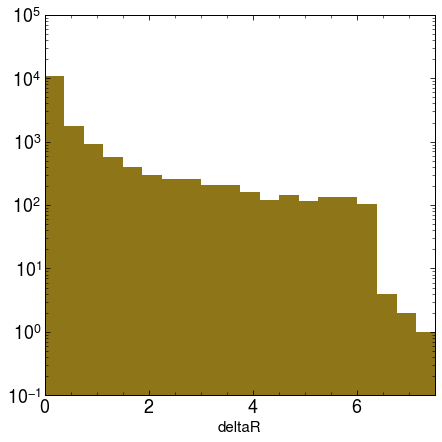

In [143]:
plt.figure(figsize=[7,7])
plt.semilogy()
plt.xlim(0,7.5)
plt.hist(deltaR, bins=20, color='xkcd:hazel')
plt.xlabel('deltaR', fontsize=15) #I think this is right??

### Try the built-in deltaR method

In [123]:
pi0combine = ak.zip({
    "pt": pt_pi0sel_slice,
    "eta": eta_pi0sel_slice,
    "phi": phi_pi0sel_slice,
    "mass": m_pi0sel_slice,
})

protcombine = ak.zip({
    "pt": pt_protsel_slice,
    "eta": eta_protsel_slice,
    "phi": phi_protsel_slice,
    "mass": m_protsel_slice,
})

pi0combine, protcombine

(<Array [{pt: 5.6, eta: 1.75, ... mass: 0.135}] type='16565 * {"pt": float64, "et...'>,
 <Array [{pt: 70.6, eta: 1.78, ... mass: 0.938}] type='16565 * {"pt": float64, "e...'>)

In [124]:
pi04D = ak.with_name(pi0combine, "Momentum4D")
prot4D = ak.with_name(protcombine, "Momentum4D")

In [126]:
deltaR2 = pi04D.deltaR(prot4D)

In [129]:
np.array(deltaR2)

array([0.03329617, 0.00959225, 0.0220777 , ..., 0.47564819, 1.26615968,
       0.16705841])

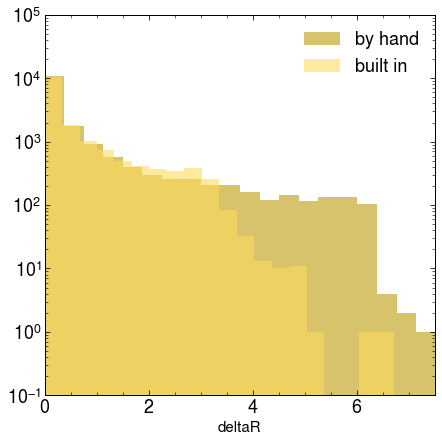

In [145]:
plt.figure(figsize=[7,7])
plt.semilogy()
plt.xlim(0,7.5)
plt.hist(deltaR, bins=20, color='xkcd:ocher', label='by hand', alpha=.6)
plt.hist(deltaR2, bins=20, color='xkcd:light gold', label='built in', alpha=.6)
plt.xlabel('deltaR', fontsize=15)
plt.legend() #WELP was good to explore but built-in one is likely correct; probably more nuance to treating phi as a polar coord that I'm not considering in my by-hand version. but good to try anyway.

### Make some plots like Albert's

In [146]:
pt_pi0sel_slice, deltaR #lots of nans in deltaR though.... not anymore!

(array([  5.60091019, 104.86014557,  71.0463562 , ...,   8.96579456,
          1.80230665,  43.45296478]),
 array([0.03329617, 0.00959225, 0.0220777 , ..., 0.47564819, 5.90582636,
        0.16705841]))

In [147]:
nans = ~np.isnan(deltaR) #this isn't needed anymore btw

In [148]:
nans

array([ True,  True,  True, ...,  True,  True,  True])

In [149]:
deltaR_clean = deltaR[nans]
pt_pi0_clean = pt_pi0sel_slice[nans]
pt_prot_clean = pt_protsel_slice[nans]

In [150]:
len(deltaR_clean) #damn that's a lot of nans

16565

In [151]:
#sum the 4-cevtors to get pt(delta):
delta4D = pi04D + prot4D

In [152]:
delta4D.pt #okay cool

<Array [76.2, 145, 351, ... 12.7, 3.22, 55.3] type='16565 * float64'>

In [153]:
delta4D_clean = delta4D[nans]

Text(0.5, 0, 'log$p_T$($\\Delta$)')

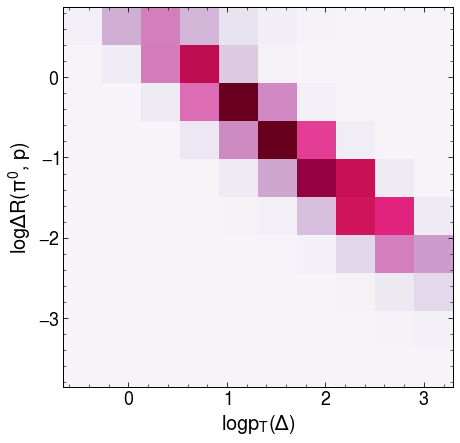

In [154]:
plt.figure(figsize=[7,7])
plt.hist2d(np.log10(np.array(delta4D_clean.pt)), np.log10(deltaR_clean), cmap='PuRd')
plt.ylabel('log$\Delta R$($\pi^0$, p)')
plt.xlabel('log$p_T$($\Delta$)')

Text(0.5, 0, 'log$p_T$($p$)')

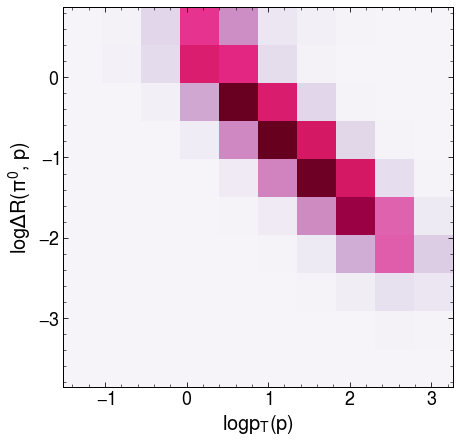

In [155]:
plt.figure(figsize=[7,7])
plt.hist2d(np.log10(pt_prot_clean), np.log10(deltaR_clean), cmap='PuRd')
plt.ylabel('log$\Delta R$($\pi^0$, p)')
plt.xlabel('log$p_T$($p$)')

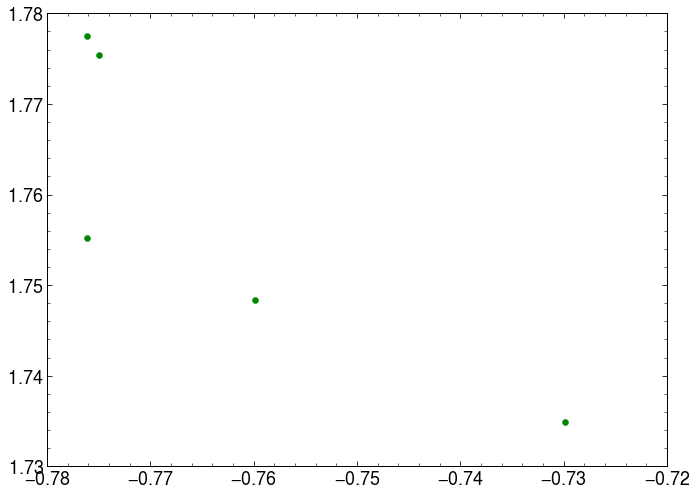

In [93]:
plt.scatter(phiselec[0], etaselec[0]) #5 particles in the first event ?